In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coviddataset/datasetCovid.csv


In [57]:
donnees_covid = pd.read_csv('/kaggle/input/coviddataset/datasetCovid.csv', encoding='latin1')
print(donnees_covid.head())

        Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                     

In [58]:
# Get the titles of the columns
column_titles = donnees_covid.columns
print("Titles of the columns:", column_titles)

Titles of the columns: Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)


In [59]:
# Analyse de la variable cible
target_analysis = donnees_covid['SARS-Cov-2 exam result'].describe()
print("target analysis",target_analysis)

print("------------------------------------")

# Nombre de lignes et de colonnes
nombre_lignes, nombre_colonnes = donnees_covid.shape
print(f"Il y a {nombre_lignes} lignes et {nombre_colonnes} colonnes.")

print("------------------------------------")

# Types de variables
types_variables = donnees_covid.dtypes
print(types_variables)

print("------------------------------------")

# Analyse des valeurs manquantes
valeurs_manquantes = donnees_covid.isnull().sum()
print(valeurs_manquantes)

target analysis count         5644
unique           2
top       negative
freq          5086
Name: SARS-Cov-2 exam result, dtype: object
------------------------------------
Il y a 5644 lignes et 111 colonnes.
------------------------------------
Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object
------------

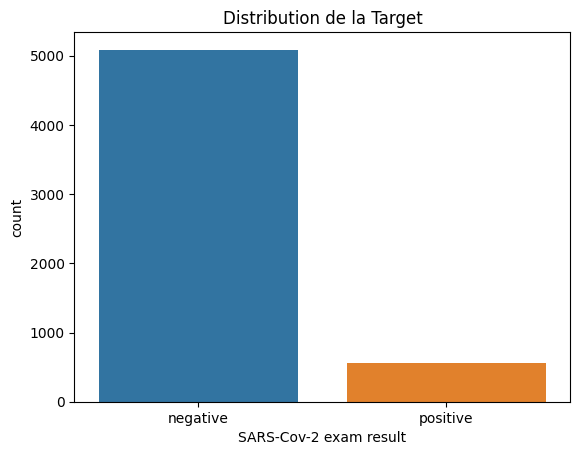

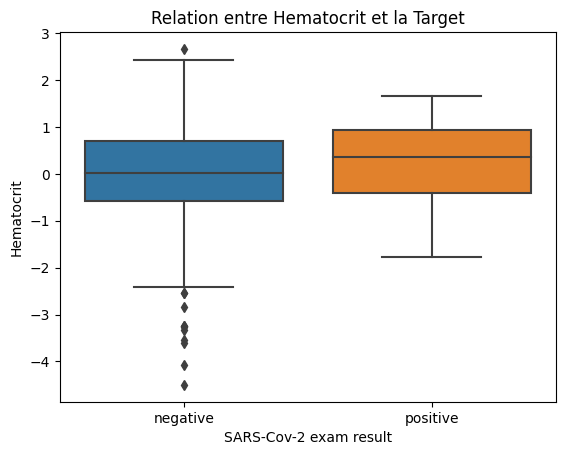

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de la Target
sns.countplot(x='SARS-Cov-2 exam result', data=donnees_covid)
plt.title('Distribution de la Target')
plt.show()

# Signification des variables
# Vous pouvez explorer les statistiques descriptives pour les variables importantes
# par exemple, Hematocrit, Hemoglobin, etc.
# Exemple : donnees_covid['Hematocrit'].describe()

# Relation variable/Target
# Exemple : Relation entre 'Hematocrit' et 'SARS-Cov-2 exam result'
sns.boxplot(x='SARS-Cov-2 exam result', y='Hematocrit', data=donnees_covid)
plt.title('Relation entre Hematocrit et la Target')
plt.show()

In [61]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Séparer les colonnes numériques et catégorielles
colonnes_numeriques = donnees_covid.select_dtypes(include=['float64']).columns
colonnes_catégorielles = donnees_covid.select_dtypes(include=['object']).columns

# Afficher les colonnes numériques
print("Colonnes numériques avant filtrage:", colonnes_numeriques)

# Filtrer uniquement les colonnes numériques
colonnes_numeriques = donnees_covid[colonnes_numeriques].select_dtypes(include=['float64']).columns

# Afficher les colonnes numériques après filtrage
print("Colonnes numériques après filtrage:", colonnes_numeriques)

# Traitement des valeurs manquantes pour les colonnes numériques
imputeur_numerique = SimpleImputer(strategy='mean')
donnees_covid[colonnes_numeriques] = imputeur_numerique.fit_transform(donnees_covid[colonnes_numeriques])

# Traitement des valeurs manquantes pour les colonnes catégorielles
imputeur_catégoriel = SimpleImputer(strategy='most_frequent')
donnees_covid[colonnes_catégorielles] = imputeur_catégoriel.fit_transform(donnees_covid[colonnes_catégorielles])

# Gestion des colonnes catégorielles
label_encoder = LabelEncoder()
donnees_covid['SARS-Cov-2 exam result'] = label_encoder.fit_transform(donnees_covid['SARS-Cov-2 exam result'])

# Normalisation des données numériques
scaler = StandardScaler()
donnees_covid_normalise = pd.DataFrame(scaler.fit_transform(donnees_covid), columns=donnees_covid.columns)

# Séparation des données en ensemble d'entraînement et de test
X = donnees_covid_normalise.drop('SARS-Cov-2 exam result', axis=1)
y = donnees_covid_normalise['SARS-Cov-2 exam result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Affichage des premières lignes du nouveau dataframe
print(donnees_covid_normalise.head())


Colonnes numériques avant filtrage: Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Serum Glucose',
       'Mycoplasma pneumoniae', 'Neutrophils', 'Urea',
       'Proteina C reativa mg/dL', 'Creatinine', 'Potassium', 'Sodium',
       'Alanine transaminase', 'Aspartate transaminase',
       'Gamma-glutamyltransferase ', 'Total Bilirubin', 'Direct Bilirubin',
       'Indirect Bilirubin', 'Alkaline phosphatase', 'Ionized calcium ',
       'Magnesium', 'pCO2 (venous blood gas analysis)',
       'Hb saturation (venous blood gas analysis)',
       'Base excess (venous blood gas analysis)',
       'pO2 (venous blood gas analysis)', 'Fio2 (venous blood gas analysis)',
       'Total CO

ValueError: Columns must be same length as key